### Machine learning application with dataset 'Wine quality'

###### 05/03/2021

##### Summary of machine learning application with dataset 'Wine quality':

The problem we have to solve is to help in predicting the quality of wine with the help of classification models. The dataset is provided for the same to help us in training and testing phase.

In my project, I firstly clean the data by checking null values, feature distritribution, and use oversampling to reshape the data. Then I use models include Linear regression, Lasso, random forest, and KNN. I calculate their train&test accuracy and visulize the feature importance by feature for each of them. My final result is that my KNN model with n=5 has the best accuracy, which is 99.71%.

Outline:
1.Data cleaning

1.1 Check correlation

1.2 Data distribution  

1.3 Reomve the remaning skewness by using log transform¶

1.4 Feature distribution after normolization

2.Train Test Split

2.1 K-fold Cross validation

2.2 Random over sampling

3.Model evaluation: Linear regression, Lasso, Random Forest, KNN

3.1 Linear regression Train < Test (a little only) → Overfitting

3.2 Lasso: Train < Test (a little only) → Overfitting

3.3 Random Forest: Train > Test (a little only) → Good fit

3.4 KNN (Best model!) Train > Test (a little only) → Good fit¶

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.regressor import PredictionError, ResidualsPlot
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sb
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import PredictionError, ResidualsPlot
from yellowbrick.regressor.alphas import AlphaSelection
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, balanced_accuracy_score
from sklearn.model_selection import KFold
import imblearn
print(imblearn.__version__)

from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTEN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

0.8.0


# 1. Data Cleaning

In [3]:
wine = pd.read_csv('winequality-red.txt', sep=",", low_memory=False)

In [4]:
#wine.head(10)

In [5]:
#wine.columns.tolist()

In [6]:
#wine.info()

In [7]:
#check errors
wine.isnull().sum()

fixedAcidity          0
volatileAcidity       0
citricAcid            0
residualSugar         0
chlorides             0
freeSulfurDioxide     0
totalSulfurDioxide    0
density               0
pH                    0
sulphates             0
alcohol               0
quality               0
dtype: int64

In [8]:
#sb.heatmap(wine.isnull())

## 1.1 Check correlation

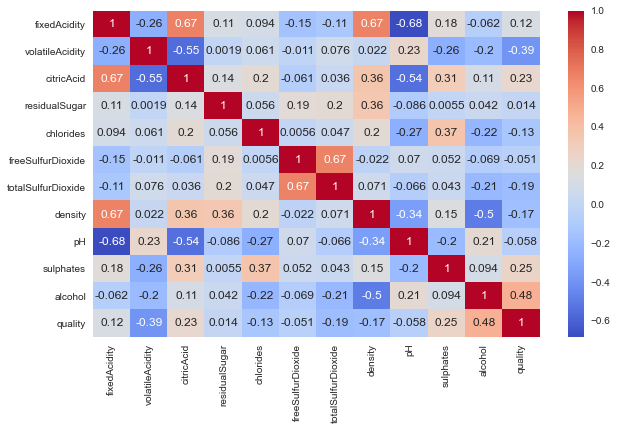

In [9]:
fig = plt.figure(figsize = (10,6))
sns.heatmap(wine.corr(),cmap='coolwarm',annot=True)

## 1.2 Check feature distribution

In [10]:
t1=wine.iloc[:,0:-1].describe()
t1
#t2=t1[t1['std']>1]

,fixedAcidity,volatileAcidity,citricAcid,residualSugar,chlorides,freeSulfurDioxide,totalSulfurDioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [11]:
clist = ['fixedAcidity','volatileAcidity','citricAcid','residualSugar',
         'chlorides','freeSulfurDioxide','totalSulfurDioxide',
         'density','pH','sulphates', 'alcohol']

Distplots of the features:


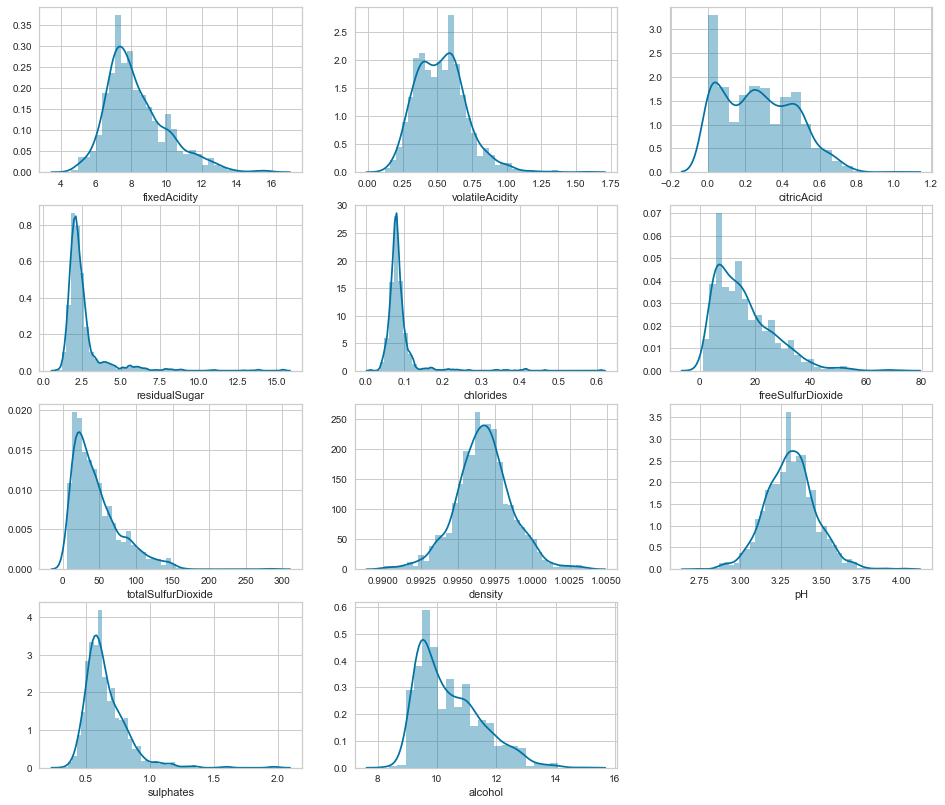

In [12]:
plt.figure(figsize = (16, 14))
for i in range(0, len(clist)):
    plt.subplot(4,3, i+1)
    sb.distplot(wine[clist[i]])
print("Distplots of the features:")
plt.show()

In [13]:
from scipy.stats import zscore
# calculating the absolute z-score
z = np.abs(zscore(wine))
# Removing the outliers
wine1 = wine[(z < 3).all(axis = 1)]
wine1.shape

(1451, 12)

In [14]:
clist = ['fixedAcidity','volatileAcidity','citricAcid','residualSugar',
         'chlorides','freeSulfurDioxide','totalSulfurDioxide',
         'density','pH','sulphates', 'alcohol']

print('skewness for feature old vs new:\n')
for i in range(0, len(clist)):
    print(f"{clist[i]}:{round(wine[clist[i]].skew(),4)} vs {round(wine1[clist[i]].skew(),4)}\n")

skewness for feature old vs new:

fixedAcidity:0.9828 vs 0.8239

volatileAcidity:0.6716 vs 0.3807

citricAcid:0.3183 vs 0.2913

residualSugar:4.5407 vs 2.4561

chlorides:5.6803 vs 2.2752

freeSulfurDioxide:1.2506 vs 0.8692

totalSulfurDioxide:1.5155 vs 1.1832

density:0.0713 vs 0.0557

pH:0.1937 vs 0.1147

sulphates:2.4287 vs 0.8915

alcohol:0.8608 vs 0.759



## 1.4 Reomve the remaning skewness by using log transform 

In [15]:
loglist = ['fixedAcidity','residualSugar',
           'chlorides','freeSulfurDioxide',
           'totalSulfurDioxide','sulphates', 'alcohol']

for i in range(0, len(loglist)):
    wine1[loglist[i]] = np.log(wine1[loglist[i]])
    
print("Skeness for new dataset after log transform:")
wine1.skew()

Skeness for new dataset after log transform:


fixedAcidity          0.377931
volatileAcidity       0.380659
citricAcid            0.291297
residualSugar         1.227096
chlorides             0.496272
freeSulfurDioxide    -0.303456
totalSulfurDioxide   -0.096908
density               0.055738
pH                    0.114705
sulphates             0.342375
alcohol               0.592414
quality               0.407865
dtype: float64

In [16]:
from scipy.stats import boxcox
wine1['residualSugar'] = boxcox(wine1['residualSugar'])[0]
print("Skeness for new dataset after boxcox transform:")
wine1.skew()

Skeness for new dataset after boxcox transform:


fixedAcidity          0.377931
volatileAcidity       0.380659
citricAcid            0.291297
residualSugar         0.017700
chlorides             0.496272
freeSulfurDioxide    -0.303456
totalSulfurDioxide   -0.096908
density               0.055738
pH                    0.114705
sulphates             0.342375
alcohol               0.592414
quality               0.407865
dtype: float64

## 1.5 Feature distribution after normolization

Distplots of the features:


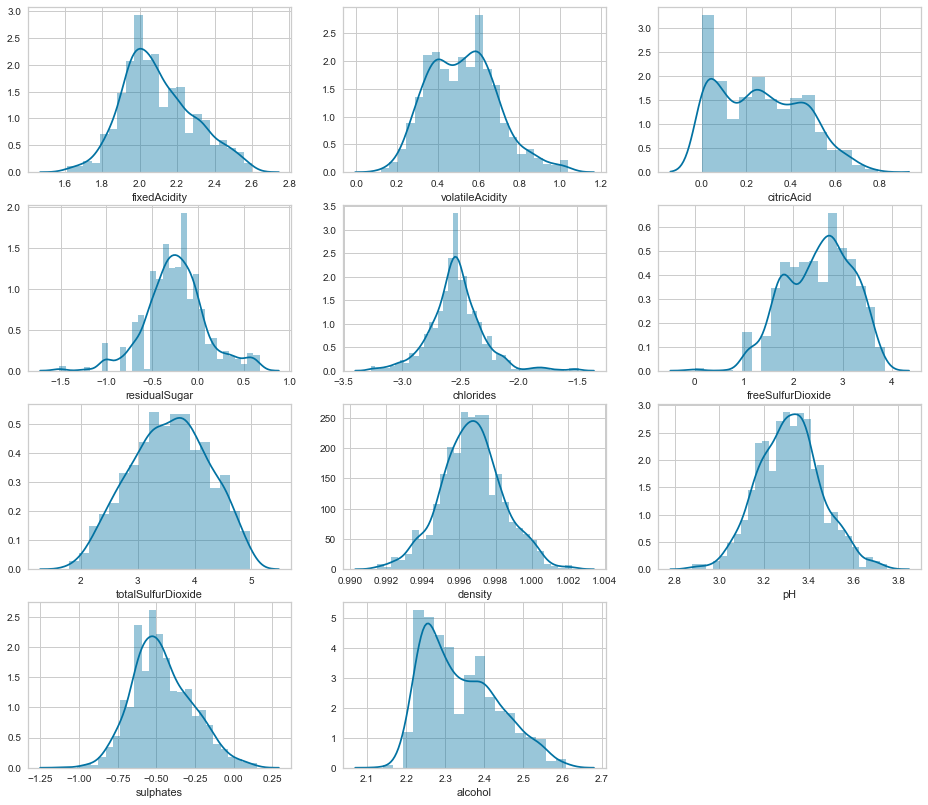

In [17]:
plt.figure(figsize = (16, 14))
for i in range(0, len(clist)):
    plt.subplot(4,3, i+1)
    sb.distplot(wine1[clist[i]])
print("Distplots of the features:")
plt.show()

In [18]:
wine1.head(10)
wine1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fixedAcidity        1451 non-null   float64
 1   volatileAcidity     1451 non-null   float64
 2   citricAcid          1451 non-null   float64
 3   residualSugar       1451 non-null   float64
 4   chlorides           1451 non-null   float64
 5   freeSulfurDioxide   1451 non-null   float64
 6   totalSulfurDioxide  1451 non-null   float64
 7   density             1451 non-null   float64
 8   pH                  1451 non-null   float64
 9   sulphates           1451 non-null   float64
 10  alcohol             1451 non-null   float64
 11  quality             1451 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 147.4 KB


In [19]:
#fig = plt.figure(figsize = (10,6))
#sns.heatmap(wine1.corr(),cmap='coolwarm',annot=True)

# 2. Train Test Split

In [20]:
X= wine1.drop('quality',axis=1) # one = columns, zero = rows
y= wine1['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

## 2.1  K-fold Cross validation 

In [21]:
models=[("Logistic Regression", LogisticRegression()),
        ("Decision Tree", DecisionTreeClassifier()),
        ("Random Forest", RandomForestClassifier()),
        ("Extra Trees", ExtraTreesClassifier()),
        ("Gradient Boostin", GradientBoostingClassifier()),
        ("KNeighbors", KNeighborsClassifier()),
        ("SVM", SVC()),
        ("Naive Bayes", GaussianNB()),
        ("Ada Boost", AdaBoostClassifier())]

for name, model in models:
    kfold = KFold(n_splits=10)
    results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    print(f"\x1b[96m{name}\x1b[0m: \x1b[95m{results.mean():.4f}\x1b[0m ± {results.std():.4f}")

Logistic Regression: 0.5914 ± 0.0289
Decision Tree: 0.6112 ± 0.0460
Random Forest: 0.7017 ± 0.0235
Extra Trees: 0.6905 ± 0.0339
Gradient Boostin: 0.6543 ± 0.0282
KNeighbors: 0.5440 ± 0.0326
SVM: 0.5578 ± 0.0536
Naive Bayes: 0.5810 ± 0.0352
Ada Boost: 0.3810 ± 0.0897


## 2.2  Random over sampling

In [22]:
counter = Counter(y)
print(counter)

Counter({5: 617, 6: 586, 7: 185, 4: 47, 8: 16})


In [23]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

[(4, 617), (5, 617), (6, 617), (7, 617), (8, 617)]


In [24]:
oversample = SMOTE(sampling_strategy = {5: 5000, 6: 5000, 7: 5000, 4: 5000, 8: 5000})
X_smote, y_smote = oversample.fit_resample(X, y)
counter = Counter(y_smote)
print(counter)

Counter({5: 5000, 6: 5000, 7: 5000, 4: 5000, 8: 5000})


# 3. Model evaluation: Linear regression, Lasso, KNN

## 3.1 Linear regression Train < Test (a little only) → Overfitting

In [25]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.25, random_state=0)

lr = LinearRegression()
lr.fit(X_train_smote, y_train_smote)
lr_predict = lr.predict(X_test_smote)

print('Linear regression Train accuracy:',"{:.2%}".format(lr.score(X_train_smote, y_train_smote)))
print('Linear regression Test accuracy:',"{:.2%}".format(lr.score(X_test_smote, y_test_smote)))

Linear regression Train accuracy: 68.30%
Linear regression Test accuracy: 68.56%


### Linear regression feature importance

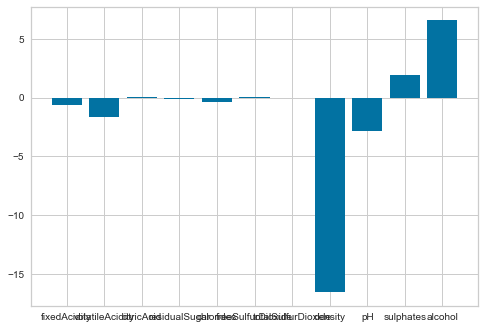

In [26]:
importance = lr.coef_
pyplot.bar(clist,importance)
pyplot.show()

## 3.2 Lasso: Train < Test (a little only) → Overfitting

In [27]:

X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.25, random_state=0)
lasso = Lasso(alpha = 0.001)
lasso.fit(X_train_smote, y_train_smote)
lasso_predict = lasso.predict(X_test_smote)

print('Lasso Train accuracy:',"{:.2%}".format(lasso.score(X_train_smote, y_train_smote)))
print('Lasso Test accuracy:',"{:.2%}".format(lasso.score(X_test_smote, y_test_smote)))

Lasso Train accuracy: 68.27%
Lasso Test accuracy: 68.48%


### Lasso feature importance

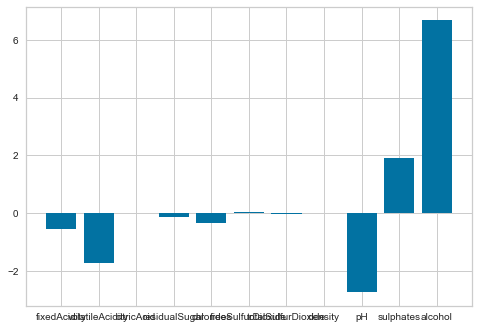

In [28]:
importance = lasso.coef_
pyplot.bar(clist,importance)
pyplot.show()

## 3.3 Random Forest: Train > Test (a little only) → Good fit 

In [48]:
rf_parameters = {'max_depth': [2,3,4,5], 'n_estimators':[50,100,150,200]}
rf = model_selection.GridSearchCV(
    RandomForestClassifier(random_state = 42), rf_parameters, cv=3).fit(X_train_smote, y_train_smote)
rf_yhat_test = rf.predict(X_test_smote)
rf_yhat_original = rf.predict(X_smote)


print(rf.best_estimator_)
print('Accuracy score on testing set: ', round(metrics.accuracy_score(rf_yhat_test, y_test_smote), 3))

RandomForestClassifier(max_depth=5, n_estimators=200, random_state=42)
Accuracy score on testing set:  0.738


In [60]:
rf=RandomForestClassifier(max_depth=5, n_estimators=200,random_state = 42)
rf.fit(X_train_smote, y_train_smote)
print('Random Forest train accuracy:',"{:.2%}".format(rf.score(X_train_smote, y_train_smote)))
print('Random Forest test accuracy:',"{:.2%}".format(rf.score(X_test_smote, y_test_smote)))

Random Forest train accuracy: 74.02%
Random Forest test accuracy: 73.84%


### Random Froest feature importances

In [77]:
rf.feature_importances_

array([0.0269188 , 0.13021437, 0.06107899, 0.01632789, 0.05618893,
       0.05008065, 0.11683891, 0.04483876, 0.0676717 , 0.20579418,
       0.22404683])

<BarContainer object of 11 artists>

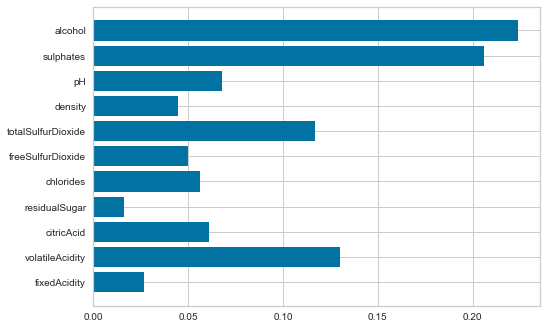

In [107]:
clist = ['fixedAcidity','volatileAcidity','citricAcid','residualSugar',
         'chlorides','freeSulfurDioxide','totalSulfurDioxide',
         'density','pH','sulphates', 'alcohol']

plt.barh(clist, rf.feature_importances_)

## 3.4 KNN (Best model!) Train > Test (a little only) → Good fit¶

### 3.4.1 Train > Test (a little only) → Good fit N=1 is the best!

In [29]:
knn_dict = {}
for k in (5,10,15):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_smote,y_train_smote)
    print("neighbors:",k)
    print('knn Train accuracy:',"{:.2%}".format(knn.score(X_train_smote,y_train_smote)))
    print('knn Test accuracy:',"{:.2%}".format(knn.score(X_test_smote,y_test_smote)))
    print('\n')

neighbors: 5
knn Train accuracy: 99.64%
knn Test accuracy: 99.17%


neighbors: 10
knn Train accuracy: 98.57%
knn Test accuracy: 97.70%


neighbors: 15
knn Train accuracy: 96.84%
knn Test accuracy: 95.92%


